# Configuração do Ambiente

### Importação de todas as bibliotecas que serão utilizadas ao longo do notebook

In [4]:
# Biblioteca para manipulação e análise de dados em dataframes
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Avaliação da performance do modelo
from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             recall_score,
                             precision_score)

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_predict, cross_validate, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import joblib


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold, cross_val_predict

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

Leitura de todos os arquivos CSV

In [5]:
# Carrega os dados referentes ao conjunto de dados de treinamento.
train = pd.read_csv('train.csv')
# Carrega os dados referentes ao conjunto de dados de teste.
test = pd.read_csv('test.csv')

# Exploração dos Dados

Comparação das colunas dos dois conjuntos de dados (teste e treinamento)

In [6]:
print('Colunas de Treinamento:', train.columns.tolist())
print('Colunas de Teste:', test.columns.tolist())

Colunas de Treinamento: ['id', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'labels']
Colunas de Teste: ['id', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_r

Análise do tamanho do conjunto de dados

In [7]:
# Verifica o tamanho do conjunto de dados
print(f'Tamanho dos dados: {train.shape}\n')

print(f'A base de dados tem {train.shape[0]} linhas e {train.shape[1]} colunas.')

Tamanho dos dados: (646, 33)

A base de dados tem 646 linhas e 33 colunas.


Resumo estatístico dos dados

In [8]:
train.describe()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
count,646.000000,611.000000,637.000000,508.000000,535.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,461.577399,2.341718,4.037724,3.352657,4.944729,7.948916,2.351393,2.949633e+07,1.913313,0.546440,...,0.003096,0.304954,0.329721,0.260062,0.515480,0.419505,0.235294,0.091331,2.848655,0.647059
std,264.859464,2.468275,2.950923,2.866952,3.213319,7.397602,1.357856,2.261999e+08,1.337095,0.498224,...,0.055598,0.460745,0.470476,0.439008,0.500148,0.493860,0.424511,0.288303,1.894050,0.478255
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,233.250000,0.680000,1.870000,1.185000,2.540000,3.000000,1.000000,3.000000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
50%,459.500000,1.650000,3.610000,2.785000,4.620000,6.000000,2.000000,1.020000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000
75%,692.500000,3.600000,5.590000,4.935000,6.880000,10.000000,3.000000,2.587500e+07,3.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,923.000000,21.900000,21.900000,24.680000,24.680000,63.000000,8.000000,5.700000e+09,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


Verificação do tipo de dado de cada coluna do dataset

In [9]:
# Verifica os tipos das colunas e a quantidade de entradas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        646 non-null    int64  
 1   age_first_funding_year    611 non-null    float64
 2   age_last_funding_year     637 non-null    float64
 3   age_first_milestone_year  508 non-null    float64
 4   age_last_milestone_year   535 non-null    float64
 5   relationships             646 non-null    int64  
 6   funding_rounds            646 non-null    int64  
 7   funding_total_usd         646 non-null    int64  
 8   milestones                646 non-null    int64  
 9   is_CA                     646 non-null    int64  
 10  is_NY                     646 non-null    int64  
 11  is_MA                     646 non-null    int64  
 12  is_TX                     646 non-null    int64  
 13  is_otherstate             646 non-null    int64  
 14  category_c

Análise da distribuição dos dados no que tange à variável alvo

In [10]:
train['labels'].value_counts(normalize=True)

,proportion
labels,
1,0.647059
0,0.352941


Variáveis Numéricas

In [11]:
# Seleciona as colunas do DataFrame combinado que possuem tipos de dados numéricos (inteiros e floats)
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Exibe as colunas numéricas identificadas
print(numerical_columns)

Index(['id', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'labels'],
      dtype='object')


Variáveis Categóricas

In [12]:
# Seleciona as colunas do DataFrame combinado que possuem o tipo de dados 'object' (geralmente usadas para dados categóricos)
categorical_columns = train.select_dtypes(include=['object']).columns

# Exibe as colunas categóricas identificadas
print(categorical_columns)

Index(['category_code'], dtype='object')


Infere-se, a partir do célula acima, que não há variáveis categóricas no conjunto de dados.

A única variável de caráter categórica é category_code, no entanto, ela já foi codificada com one-hot-coding, gerando novas colunas. Caso não tivesse codificada, o código para o one-hot-coding seria:

```
# Aplica o one-hot encoding
train = df_encoded = pd.get_dummies(train, columns=['category_code'], dtype=int)

# Mostra o encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded)
```



Análise Estatística Descritiva das Variáveis Numéricas

Número de valores não nulos, média dos valores, desvio padrão, valor mínimo primeiro quartil, mediana, terceiro quartil e valor máximo das variáveis.

In [13]:
# Gera estatísticas descritivas para as colunas numéricas do DataFrame combinado, como média, desvio padrão, mínimo, máximo, etc.
train[numerical_columns].describe()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
count,646.000000,611.000000,637.000000,508.000000,535.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,461.577399,2.341718,4.037724,3.352657,4.944729,7.948916,2.351393,2.949633e+07,1.913313,0.546440,...,0.003096,0.304954,0.329721,0.260062,0.515480,0.419505,0.235294,0.091331,2.848655,0.647059
std,264.859464,2.468275,2.950923,2.866952,3.213319,7.397602,1.357856,2.261999e+08,1.337095,0.498224,...,0.055598,0.460745,0.470476,0.439008,0.500148,0.493860,0.424511,0.288303,1.894050,0.478255
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,233.250000,0.680000,1.870000,1.185000,2.540000,3.000000,1.000000,3.000000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
50%,459.500000,1.650000,3.610000,2.785000,4.620000,6.000000,2.000000,1.020000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.333300,1.000000
75%,692.500000,3.600000,5.590000,4.935000,6.880000,10.000000,3.000000,2.587500e+07,3.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000
max,923.000000,21.900000,21.900000,24.680000,24.680000,63.000000,8.000000,5.700000e+09,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


Contagem de Frequência das Variáveis

Mostra quantas vezes cada variável apareceu no conjunto de dados

In [14]:
# Conta a ocorrência de cada valor único na coluna 'clientCode' do DataFrame cadastral
age_first_funding_year_counts = train['age_first_funding_year'].value_counts()

# Exibe as contagens de 'clientCode'
print(age_first_funding_year_counts)

age_first_funding_year
0.00    38
0.75    11
0.67    10
2.00    10
0.25     8
        ..
6.04     1
2.95     1
1.92     1
2.17     1
2.72     1
Name: count, Length: 334, dtype: int64


Verificação de Correlações

Heatmap que promove uma análise visual das relações entre cada variável

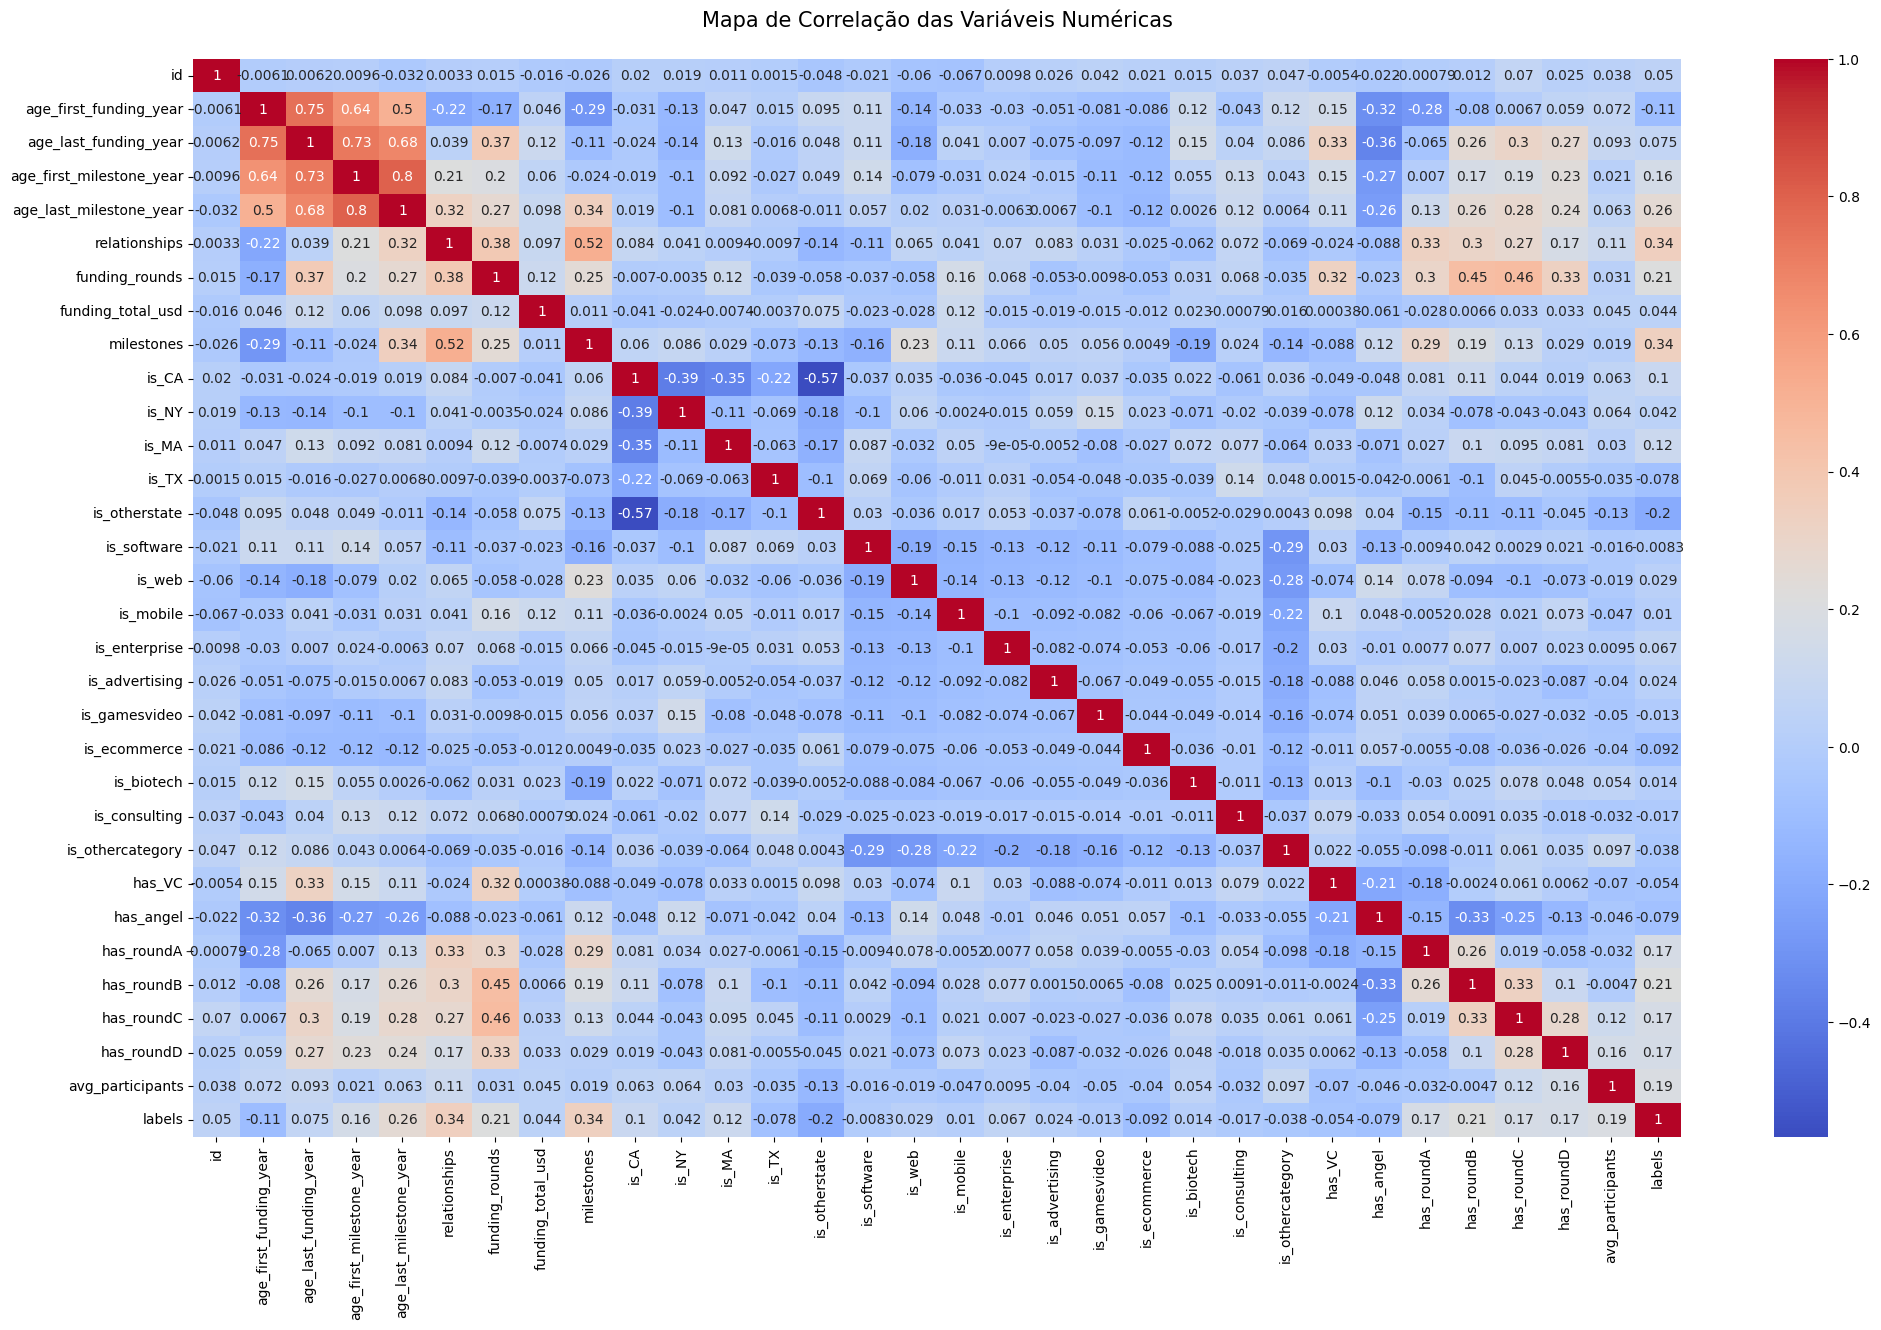

In [15]:
plt.figure(figsize = (24, 14))
correlation_matrix = train[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Gráficos - Análise da distribuição dos dados

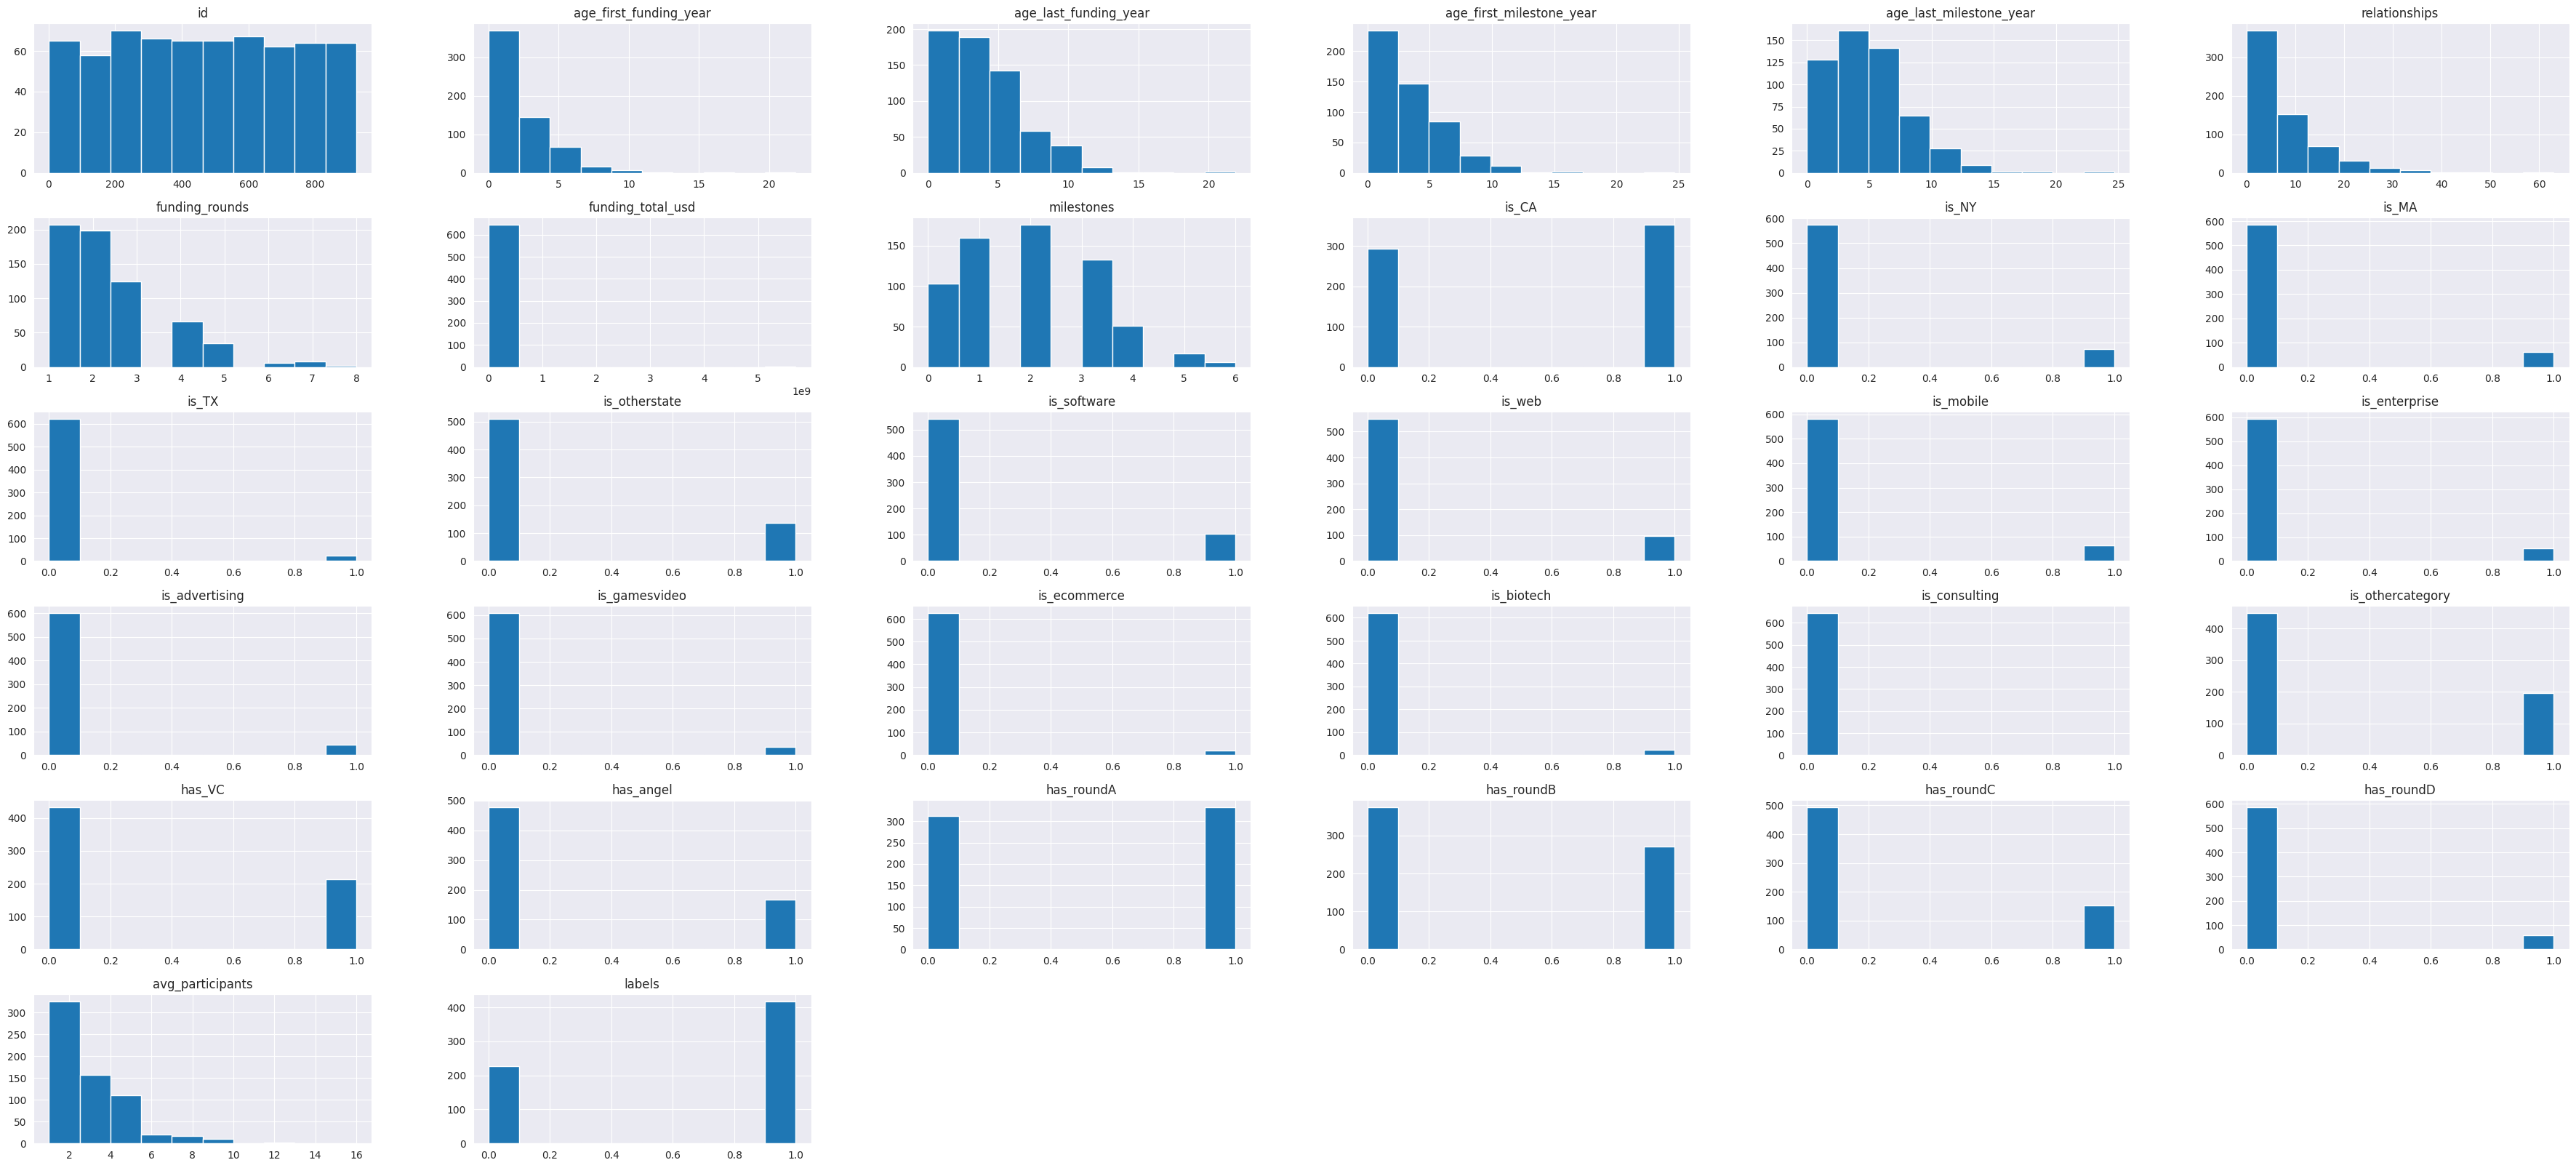

In [16]:
# Plota Histogramas para toda a base de dados
sns.set_style('darkgrid')
train.hist(figsize=(45,20))
plt.show()

## Hipóteses

Formulação de hipóteses no que tange ao conjunto de dados em questão

### Hipótese 1 - Quantos mais relacionamentos a startup tem, mais chance de sucesso ela possui.

A hipótese pode ser validada a partir da análise do boxplot abaixo, gerado com a biblioteca matplotlib:

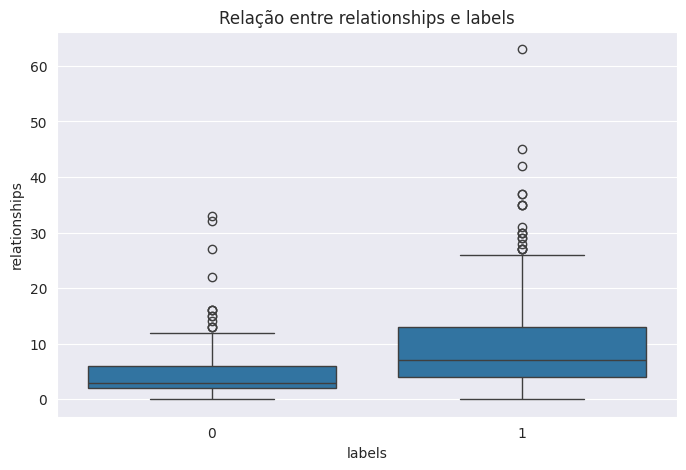

In [17]:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='labels', y='relationships', data=train)
    plt.title(f"Relação entre {'relationships'} e {'labels'}")
    plt.show()

Dessa forma, é possível observar no boxplot acima que, na maior parte das vezes, quanto maior é o valor na coluna "relationships", mais provável é a variável alvo "labels" ser igual a 1 (haja vista que a área em azul do boxplot é mais "alta" quando "labels" é 1).

### Hipótese 2 - Startups do campo da tecnologia tem mais chance de obterem sucesso quando comparadas à startups de outras áreas.

É possível analisar a hipótese por intermédio dos gráficos gerados abaixo:

/tmp/ipython-input-355205112.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="feature", y='labels', hue="valor", data=df_melt, ci=None)


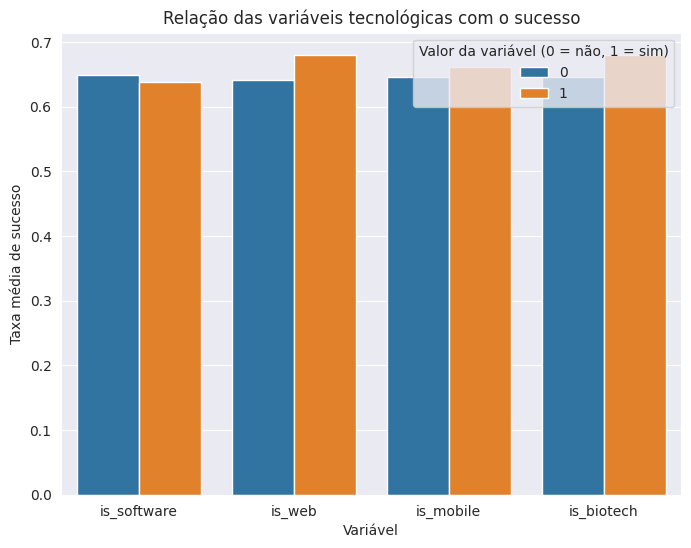

In [35]:
# Colunas que você quer analisar
cols = ['is_software', 'is_web', 'is_mobile', 'is_biotech']

# Calcular a média do alvo para cada feature (comparando 0 e 1)
df_melt = train[cols + ['labels']].melt(id_vars='labels', var_name="feature", value_name="valor")

plt.figure(figsize=(8,6))
sns.barplot(x="feature", y='labels', hue="valor", data=df_melt, ci=None)
plt.title("Relação das variáveis tecnológicas com o sucesso")
plt.ylabel("Taxa média de sucesso")
plt.xlabel("Variável")
plt.legend(title="Valor da variável (0 = não, 1 = sim)")
plt.show()

/tmp/ipython-input-4014148681.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="feature", y='labels', hue="valor", data=df_melt, ci=None)


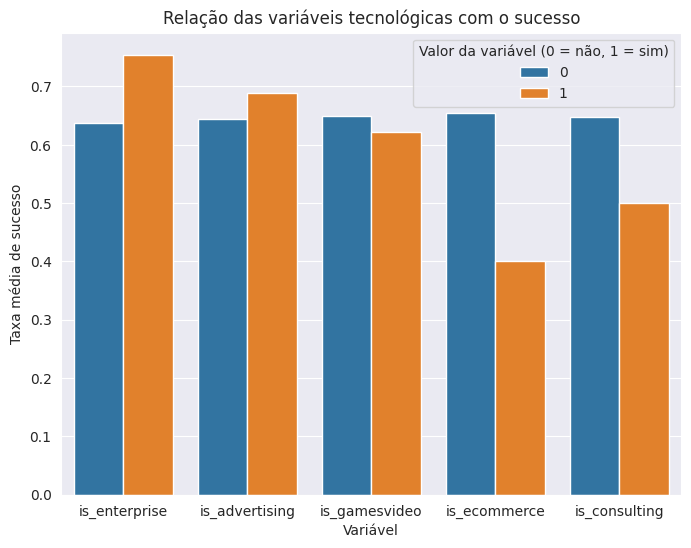

In [38]:
# Colunas que você quer analisar
outras_cols = ['is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_consulting']

# Calcular a média do alvo para cada feature (comparando 0 e 1)
df_melt = train[outras_cols + ['labels']].melt(id_vars='labels', var_name="feature", value_name="valor")

plt.figure(figsize=(8,6))
sns.barplot(x="feature", y='labels', hue="valor", data=df_melt, ci=None)
plt.title("Relação das variáveis não tecnológicas com o sucesso")
plt.ylabel("Taxa média de sucesso")
plt.xlabel("Variável")
plt.legend(title="Valor da variável (0 = não, 1 = sim)")
plt.show()

Portanto, infere-se que não é possível comprovar a hipótese, em razão da semelhança notória entre a distribuição de labels 0s e 1s para todas as variáveis - exceto, no caso de "is_ecommerce", na qual torna-se claro com o segundo gráfico que a tendência nesse setor é de labels igual à 0 (porém tal efeito não configura-se como argumento suficiente para sustentar a validação da hipótese).

### Hipótese 3 - Startups em Nova York possuem mais probabilidade de obterem sucesso quando comparadas à startups do Texas.

A hipótese supracitada é validada após o treinamento do modelo com RandomForest, na seção "Desenvolvimento do Modelo Preditivo de RandomForest", com a função "feat_importances.sort_values".

## Limpeza e Tratamento de Valores Nulos

In [18]:
# Verifica dados nulos ou faltantes
train.isnull().values.any()

np.True_

In [19]:
# Aplica o fillna(0) para substituir os valores nulos nas colunas de "age" por 0
train['age_first_funding_year'] = train['age_first_funding_year'].fillna(0)
train['age_last_funding_year'] = train['age_last_funding_year'].fillna(0)
train['age_first_milestone_year'] = train['age_first_milestone_year'].fillna(0)
train['age_last_milestone_year'] = train['age_last_milestone_year'].fillna(0)

test['age_first_funding_year'] = test['age_first_funding_year'].fillna(0)
test['age_last_funding_year'] = test['age_last_funding_year'].fillna(0)
test['age_first_milestone_year'] = test['age_first_milestone_year'].fillna(0)
test['age_last_milestone_year'] = test['age_last_milestone_year'].fillna(0)

# Verifica as primeiras linhas para confirmar a alteração
print(train.head())

    id  age_first_funding_year  age_last_funding_year  \
0  719                   10.42                  13.09   
1  429                    3.79                   3.79   
2  178                    0.71                   2.28   
3  197                    3.00                   5.00   
4  444                    0.66                   5.88   

   age_first_milestone_year  age_last_milestone_year  relationships  \
0                      8.98                    12.72              4   
1                      0.00                     0.00             21   
2                      1.95                     2.28              5   
3                      9.62                    10.39             16   
4                      6.21                     8.61             29   

   funding_rounds  funding_total_usd  milestones  is_CA  ...  is_consulting  \
0               3            4087500           3      1  ...              0   
1               1           45000000           0      0  ...            

In [20]:
# Verifica dados nulos ou faltantes novamente
train.isnull().values.any()

np.False_

Verifica a existência da coluna category_code

In [21]:
# 1. Seleciona apenas as colunas com dtype 'object'
df_colunas_string = train.select_dtypes(include=['object'])

# 2. Imprime os nomes das colunas
print("Colunas String/Objeto:")
print(df_colunas_string.columns.tolist())

Colunas String/Objeto:
['category_code']


Uma vez que category_code já foi codificada, urge apagá-la dos conjuntos de dados.

In [22]:
train = train.drop(columns=['category_code'])
test = test.drop(columns=['category_code'])

# Desenvolvimento do Modelo Preditivo de RandomForest

In [23]:
target_col = 'labels' # define a variável alvo
random_state = 42

In [24]:
# Define o conjunto de teste e de treinamento
X = train.drop(columns=[target_col])
y = train[target_col]
X_test = test.drop(columns=[target_col], errors='ignore')

In [25]:
print("Distribuição das classes (treino):")
print(y.value_counts(normalize=True))

Distribuição das classes (treino):
labels
1    0.647059
0    0.352941
Name: proportion, dtype: float64


In [26]:
# Cria o método RandomForest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=random_state,
    n_jobs=-1,
    class_weight='balanced'
)

In [27]:
kf = KFold(n_splits=10, shuffle=True, random_state=random_state)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

cv_results = cross_validate(rf, X, y, cv=kf, scoring=scoring, n_jobs=-1, return_train_score=False)
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric}: mean={scores.mean():.4f} std={scores.std():.4f}")

accuracy: mean=0.7773 std=0.0406
precision_macro: mean=0.7768 std=0.0431
recall_macro: mean=0.7228 std=0.0514
f1_macro: mean=0.7311 std=0.0535


In [28]:
# Visualização da Matriz de Confusão e das Métricas
y_oof = cross_val_predict(rf, X, y, cv=kf, n_jobs=-1)
print("Matriz de confusão:")
print(confusion_matrix(y, y_oof))
print("Relatório de classificação:")
print(classification_report(y, y_oof))

Matriz de confusão:
[[121 107]
 [ 37 381]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63       228
           1       0.78      0.91      0.84       418

    accuracy                           0.78       646
   macro avg       0.77      0.72      0.73       646
weighted avg       0.78      0.78      0.77       646



In [29]:
# Treina o modelo
rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

Engenharia de Features

In [30]:
# Analisa as features que foram mais importantes na execução do modelo
importances = rf.feature_importances_
feat_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

# Ordena do mais importante para o menos importante
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

print(feat_importances)

                     Feature  Importance
4    age_last_milestone_year    0.142975
5              relationships    0.114953
3   age_first_milestone_year    0.093225
7          funding_total_usd    0.093198
2      age_last_funding_year    0.083063
0                         id    0.076258
1     age_first_funding_year    0.073570
30          avg_participants    0.062074
8                 milestones    0.045056
6             funding_rounds    0.039655
28                has_roundC    0.015456
24                    has_VC    0.013999
27                has_roundB    0.013470
13             is_otherstate    0.012336
26                has_roundA    0.012162
23          is_othercategory    0.012061
9                      is_CA    0.010541
14               is_software    0.010161
29                has_roundD    0.009466
11                     is_MA    0.008990
17             is_enterprise    0.007500
16                 is_mobile    0.007492
25                 has_angel    0.007310
15              

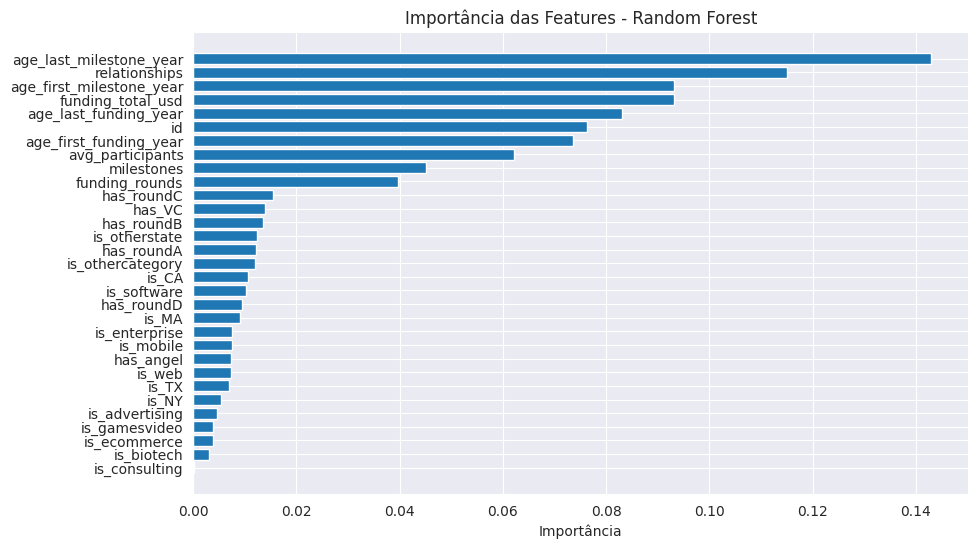

In [31]:
# Análise visual das features que foram mais importantes para o modelo
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()  # mais importantes em cima
plt.title("Importância das Features - Random Forest")
plt.xlabel("Importância")
plt.show()

Infere-se, a partir da visualização acima, que é válido aplicar engenharia de features. Por exemplo, no caso da variável "relationships", foi considerado extrair dela mais 4 colunas: has_relationship (que informa, por intermédio de um valor de 0 ou 1, se a startup tem algum relacionamento), se o relacionamento é em grandes números, pequenos ou médio.

O código desenvolvido para isso foi o seguinte:

```
# Cria a coluna has_relationship
train['has_relationship'] = (train['relationships'] > 0).astype(int)
test['has_relationship'] = (test['relationships'] > 0).astype(int)

# Cria as colunas de categoria de relcionamento, com base nos quartis
train['relationship_category'] = pd.qcut(train['relationships'], q=3, labels=['low','medium','high'])
test['relationship_category'] = pd.qcut(test['relationships'], q=3, labels=['low','medium','high'])

train = pd.get_dummies(train, columns=['relationship_category'], drop_first=True)
test = pd.get_dummies(test, columns=['relationship_category'], drop_first=True)

# Converte os valores de bool (True ou False) para int (0 ou 1)
for col in train.columns:
    if train[col].dtype == 'bool':
        train[col] = train[col].astype(int)

for col in test.columns:
    if test[col].dtype == 'bool':
        test[col] = test[col].astype(int)
```
Paralelamente, é possível excluir colunas que pouco ou nada influenciam no modelo, como "is_TX" e is_NY, da seguinte maneira:

```
train = train.drop(columns=['is_NY'])
test = test.drop(columns=['is_NY'])

train = train.drop(columns=['is_TX'])
test = test.drop(columns=['is_TX'])
```

No entanto, após essa aplicação, a acurácia do modelo diminuiu, de modo que conveio retirar a técnica do código oficial.

In [32]:
y_test_pred = rf.predict(X_test)

Geração do arquivo resultante

In [33]:
submission = pd.DataFrame({
    'id': test['id'],
    'labels': y_test_pred
})
submission.to_csv("second_sub.csv", index=False)